<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/Simulaci-n-1/blob/main/Aguja_de_buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

otra forma de ver el metodo de estimacion de pi

#Solucion analitica


Planteamiento del problema:

* Tienes líneas paralelas separadas por una distancia $d$.

* La aguja tiene una longitud $l$, donde $l≤d$.

* La aguja es lanzada al azar y se desea calcular la probabilidad
$P$ de que intersecte alguna línea.

Fórmula de solución:

La probabilidad
$P$ de que la aguja intersecte alguna línea está dada por:

$P=\frac{2l}{\pi d}$

Explicación:

* Si $l>d$, la probabilidad será
1, ya que la aguja siempre intersectará al menos una línea.

* Para $l≤d$, la probabilidad se calcula usando la fórmula mencionada.

# Ejemplo

Supongamos que tenemos las siguientes condiciones:

* Distancia entre líneas paralelas
$d=3$ unidades.

* Longitud de la aguja $l=2$ unidades.

Para resolverlo analíticamente, utilizamos la fórmula:

$$P=\frac{2l}{πd}$$

Sustituyendo los valores dados:

$$P=\frac{2\cdot 2}{\pi \cdot 3}=\frac{4}{3\pi}\approx 0.424$$

Por lo tanto, la probabilidad analítica de que la aguja intersecte alguna línea es aproximadamente $0.424$.

# Solucion por simulacion

Número de agujas: 100, Estimación de pi: 3.4482758620689657
Número de agujas: 1000, Estimación de pi: 3.215434083601286
Número de agujas: 10000, Estimación de pi: 3.2247662044501775
Número de agujas: 100000, Estimación de pi: 3.1588590201219318
Número de agujas: 500000, Estimación de pi: 3.13802279459758
Número de agujas: 1000000, Estimación de pi: 3.153688712001993


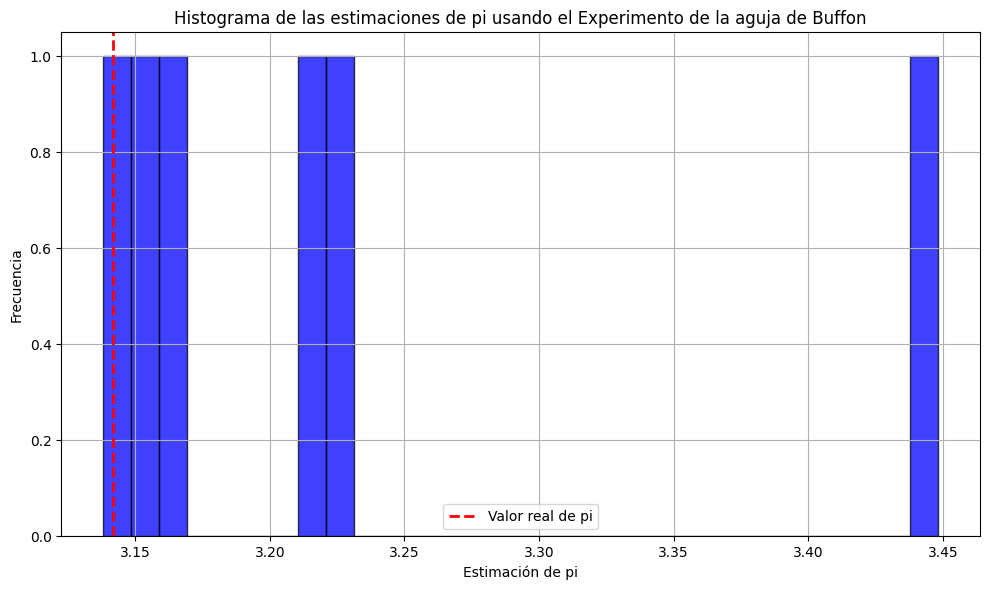

In [5]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def estimar_pi_buffon(num_agujas, longitud_aguja, distancia_lineas):
    hits = 0

    for _ in range(num_agujas):
        # Generar posición aleatoria del centro de la aguja
        x_centro = random.uniform(0, distancia_lineas / 2)
        # Generar ángulo aleatorio entre 0 y pi/2 (radianes)
        theta = random.uniform(0, math.pi / 2)

        # Calcular la posición del extremo de la aguja
        x_extremo = x_centro - (longitud_aguja / 2) * math.cos(theta)

        # Verificar si la aguja intersecta alguna línea
        if x_extremo < 0:
            hits += 1

    # Calcular la probabilidad estimada
    if num_agujas > 0:
        probabilidad_estimada = hits / num_agujas
    else:
        probabilidad_estimada = 0

    # Estimar pi
    if probabilidad_estimada > 0:
        pi_estimado = 2 * longitud_aguja / (probabilidad_estimada * distancia_lineas)
    else:
        pi_estimado = float('inf')  # Evitar división por cero

    return pi_estimado

# Parámetros de la simulación
num_agujas_lista = [100, 1000, 10000, 100000, 500000, 1000000]  # Número de agujas lanzadas
longitud_aguja = 1.0    # Longitud de la aguja (usualmente l = d)
distancia_lineas = 2.0  # Distancia entre líneas paralelas

# Lista para almacenar las estimaciones de pi
estimaciones_pi = []

# Ejecutar la simulación para cada número de agujas y almacenar resultados
for num_agujas in num_agujas_lista:
    pi_estimado = estimar_pi_buffon(num_agujas, longitud_aguja, distancia_lineas)
    estimaciones_pi.append(pi_estimado)
    print(f"Número de agujas: {num_agujas}, Estimación de pi: {pi_estimado}")

# Graficar histograma de las estimaciones de pi
plt.figure(figsize=(10, 6))
plt.hist(estimaciones_pi, bins=30, alpha=0.75, color='b', edgecolor='black')
plt.axvline(x=math.pi, color='r', linestyle='--', linewidth=2, label='Valor real de pi')
plt.xlabel('Estimación de pi')
plt.ylabel('Frecuencia')
plt.title('Histograma de las estimaciones de pi usando el Experimento de la aguja de Buffon')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
